C:\Users\claud\AppData\Local\Temp\ipykernel_25472\829631733.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = df_clean['Price'].str.replace(' EUR', '', regex=False)
C:\Users\claud\AppData\Local\Temp\ipykernel_25472\829631733.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = df_clean['Price'].str.replace('.', '').str.replace(',', '.')
C:\Users\claud\AppData\Local\Temp\ipykernel_25472\829631733.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy 

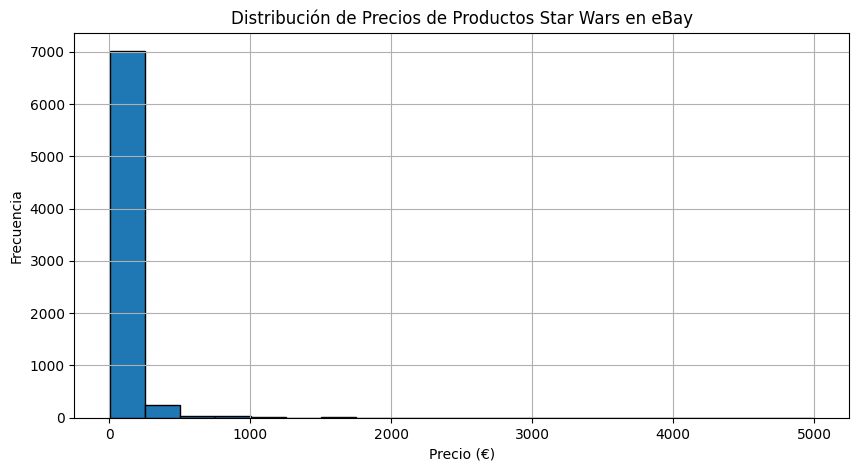

count    7342.000000
mean       57.738694
std       159.171363
min         1.000000
25%        12.990000
50%        22.370000
75%        40.000000
max      5000.000000
Name: Price, dtype: float64
                                                  Title   Price Sales
6046  2022 Star Wars Chrome Black Darth Vader - Auto...  5000.0   NaN
5723  Ultra Rare GG JABBA THE HUTT EXCLUSIVE FULL DI...  3999.0   NaN
3194  Star Wars: Darth Vader Pyre Helmet Replica 1:1...  3390.0   NaN
1310  Ultra Rare STAR WARS CODE 3 X-WING STARFIGHTER...  2999.0   NaN
2115  Ultra Rare STAR WARS CODE 3 MILLENIUM FALCON N...  2999.0   NaN


<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
 
# Cargar el archivo csv
 
df = pd.read_csv("star_wars_ebay.csv")
 
import pandas as pd
import matplotlib.pyplot as plt

# Eliminar filas con valores faltantes en la columna de precios
df_clean = df.dropna(subset=['Price'])

# Limpiar y convertir la columna 'Price' a valores numéricos
df_clean['Price'] = df_clean['Price'].str.replace(' EUR', '', regex=False)
df_clean['Price'] = df_clean['Price'].str.replace('.', '').str.replace(',', '.')
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

# Eliminar valores NaN restantes después de la conversión
df_clean = df_clean.dropna(subset=['Price'])

# Estadísticas descriptivas
price_summary = df_clean['Price'].describe()

# Graficar la distribución de precios
plt.figure(figsize=(10, 5))
plt.hist(df_clean['Price'], bins=20, edgecolor='black')
plt.title('Distribución de Precios de Productos Star Wars en eBay')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Identificar los 5 precios más altos
top_prices = df_clean.nlargest(5, 'Price')

# Imprimir resultados
print(price_summary)
print(top_prices)

# Guardar gráfico 
plt.savefig('precio_distribucion.png')